Boosting : Ensemble
  * can be used for classification/Regression
  * Linear / Non-linear
  * Here the models are trained sequentially that is one after the other where as in case of bagging the models are trained parallely.
  * Weak Learner - accuracy is low
  * Strong Learner - accuracy is high
  * Train several weak learners and combine all of them to build a strong learner.

  ******Sequential training means the models were trained one after the other based on the previous output.



## AdaBoost:
 * Weak Learner where DecisionTrees with the max depth of 1
 * Use boosting techniques when the data is having low variance and high bias.
 * When the models are built : if there are any misclassifications happened from the previous model then we will give higher weightage to those data points. So that the model is trained next properly.



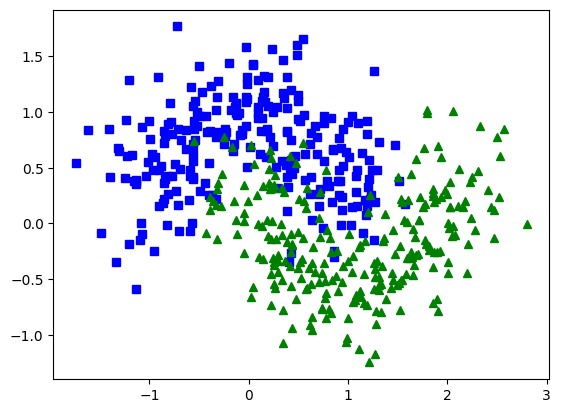

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.3,random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.show()

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,
    learning_rate=0.5,
    random_state=42
)

ada_clf.fit(X,y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

<Figure size 1000x500 with 0 Axes>

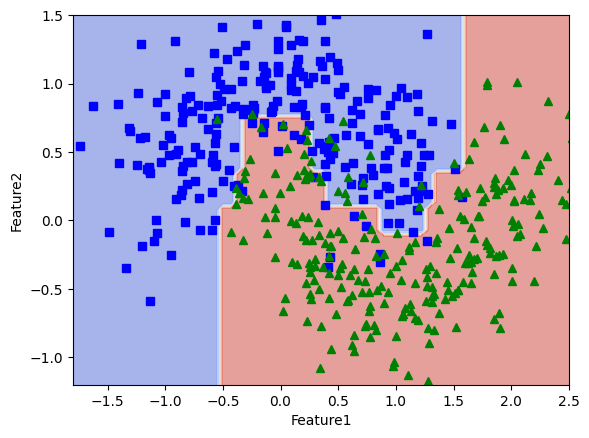

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(ada_clf,
                                              X,

                                              response_method='predict',
                                              xlabel='Feature1',
                                              ylabel='Feature2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)


plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.show()

## Stacking

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

In [7]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('dc',DecisionTreeClassifier(max_depth=4,random_state=42)),
        ('svc',SVC(probability=True,random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=10,max_depth=3,random_state=43)
)

stacking_clf.fit(X,y)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dc',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(max_depth=3,
                                                          n_estimators=10,
                                                          random_state=43))

##### Final estimator could be anything in stacking classifier

<Figure size 1000x500 with 0 Axes>

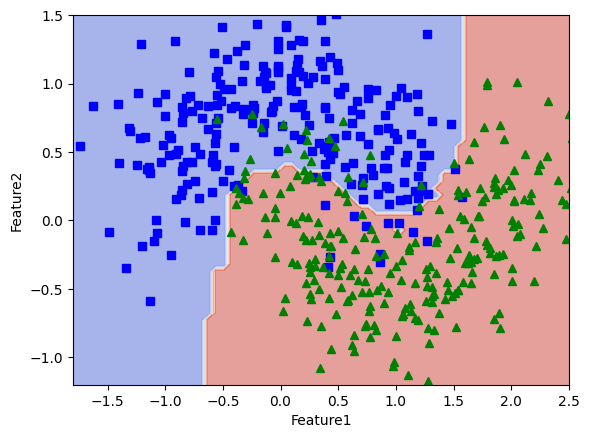

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(stacking_clf,
                                              X,

                                              response_method='predict',
                                              xlabel='Feature1',
                                              ylabel='Feature2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)


plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.show()